In [ ]:
Forecast the CocaCola prices and Airlines Passengers data set. Prepare a document for each model explaining 
how many dummy variables you have created and RMSE value for each model. Finally which model you will use for 
Forecasting.

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing # 
import statsmodels.graphics.tsaplots as tsa_plots
import statsmodels.tsa.statespace as tm_models
from datetime import datetime,time

In [6]:
cola = pd.read_excel('CocaCola_Sales_Rawdata.xlsx')

In [7]:
cola

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


<AxesSubplot:>

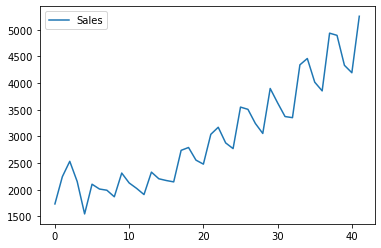

In [8]:
cola.plot()

In [9]:
cola.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [32]:
 cola["Date"] = pd.to_datetime(cola.Quarter,format="%b-%y")

ValueError: time data 'Q1_86' does not match format '%b-%y' (match)

In [29]:
plt.figure(figsize=(12,8))
heatmap_y_month = pd.pivot_table(data=cola,values='Sales',index="Quarter",columns="year",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g")

KeyError: 'year'

<Figure size 864x576 with 0 Axes>

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sales'>

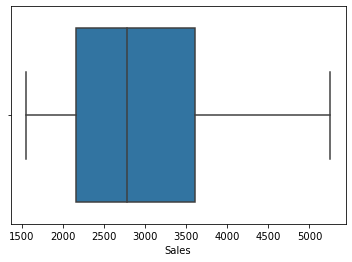

In [11]:
sns.boxplot("Sales",data=cola)

<AxesSubplot:>

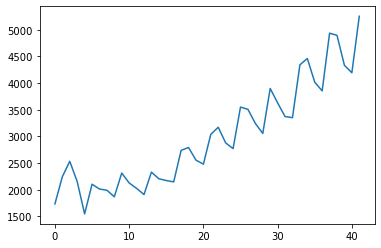

In [13]:
cola.Sales.plot(label="org")

<ipython-input-36-738bfcd79e80>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(211)


<AxesSubplot:xlabel='Quarter', ylabel='Sales'>

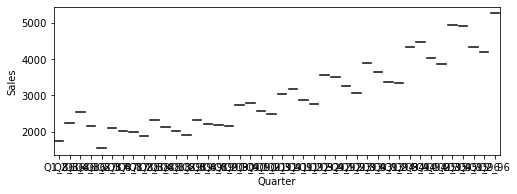

In [36]:
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x="Quarter",y="Sales",data=cola)
plt.subplot(211)
sns.boxplot(x="Quarter",y="Sales",data=cola)

<AxesSubplot:xlabel='Quarter', ylabel='Sales'>

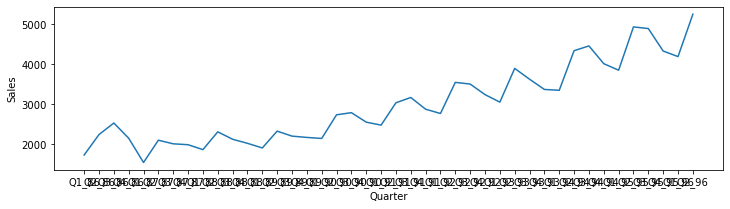

In [37]:
plt.figure(figsize=(12,3))
sns.lineplot(x="Quarter",y="Sales",data=cola)

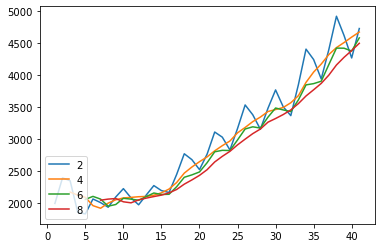

In [15]:
for i in range(2,10,2):
    cola["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc=3)

<ipython-input-40-7ca5f3a6101e>:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decompose_ts_add = seasonal_decompose(cola.Sales,freq=11)


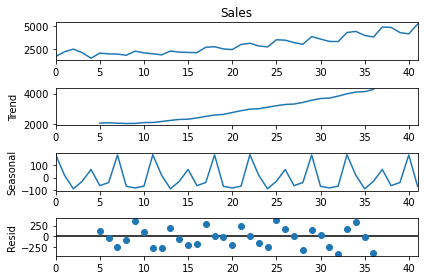

In [40]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_ts_add = seasonal_decompose(cola.Sales,freq=11)
decompose_ts_add.plot()
plt.show()

In [43]:
cola.shape

(42, 2)

In [44]:
Train = cola.head(30)
Test =cola.tail(12)

In [45]:
def MAPE(pred,org):
    temp = np.abs((pred-org))*100/org
    return np.mean(temp)

In [48]:
import statsmodels.formula.api as smf 

linear_model = smf.ols('Sales',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test)))
rmse_linear = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_linear))**2)) 
rmse_linear

PatsyError: model is missing required outcome variables

In [21]:
ses_model = SimpleExpSmoothing(Train["Sales"]).fit()
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Sales) # 9.76

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


9.765095900094403

In [22]:
hw_model = Holt(Train["Sales"]).fit()
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Sales) # 9.82

11.02518199400569

In [23]:
hwe_model_add_add = ExponentialSmoothing(Train["Sales"],seasonal="add",trend="add",seasonal_periods=4,damped=True).fit()
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Sales)# 3.10

<ipython-input-23-47b90ff29436>:1: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  hwe_model_add_add = ExponentialSmoothing(Train["Sales"],seasonal="add",trend="add",seasonal_periods=4,damped=True).fit()


3.245837023925686

In [24]:
hwe_model_mul_add = ExponentialSmoothing(Train["Sales"],seasonal="mul",trend="add",seasonal_periods=4).fit()
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Sales) # 2.35

2.974756043478155

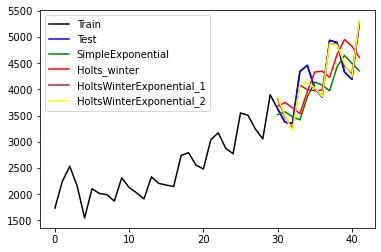

In [25]:
plt.plot(Train.index, Train["Sales"], label='Train',color="black")
plt.plot(Test.index, Test["Sales"], label='Test',color="blue")
plt.plot(pred_ses.index, pred_ses, label='SimpleExponential',color="green")
plt.plot(pred_hw.index, pred_hw, label='Holts_winter',color="red")
plt.plot(pred_hwe_add_add.index,pred_hwe_add_add,label="HoltsWinterExponential_1",color="brown")
plt.plot(pred_hwe_mul_add.index,pred_hwe_mul_add,label="HoltsWinterExponential_2",color="yellow")
plt.legend(loc='best')

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from datetime import datetime,time
import statsmodels.graphics.tsaplots as tsa_plots
import seaborn as sn
import statsmodels.api as smf

In [19]:
Airlines=pd.read_excel("Airlines+Data.xlsx")

<AxesSubplot:>

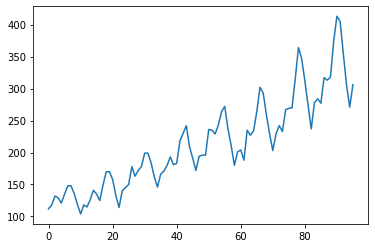

In [20]:
Airlines.columns
Airlines.Passengers.plot()

In [21]:
month =['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

In [22]:
p = Airlines["Month"][0]
p[0:3]
Airlines['months']= 0

TypeError: 'Timestamp' object is not subscriptable

In [23]:
for i in range(96):
    p = Airlines["Month"][i]
    Airlines['months'][i]= p[0:3]

TypeError: 'Timestamp' object is not subscriptable

In [ ]:
month_dummies = pd.DataFrame(pd.get_dummies(Airlines['months']))
Airlines = pd.concat([Airlines,month_dummies],axis = 1)

In [ ]:
Airlines["t"] = np.arange(1,97)

In [ ]:
Airlines["t_squared"] = Airlines["t"]*Airlines["t"]

In [ ]:
Airlines["log_Passenger"] = np.log(Airlines["Passengers"])
Airlines.rename(columns={"Passengers":'Passengers'}, inplace=True)
Airlines.Passengers.plot()

In [ ]:
Airlines.columns

In [ ]:
Train = Airlines.head(84)
Test = Airlines.tail(12)

In [ ]:
# to change the index value in pandas data frame 
Test = Test.set_index(np.arange(1,13))

In [ ]:
import statsmodels.formula.api as smf 

In [ ]:
linear_model = smf.ols('Passengers~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_linear))**2))
rmse_linear

In [ ]:

Exp = smf.ols('log_Passenger~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp
# 46.0573611031562

In [ ]:

Quad = smf.ols('Passengers~t+t_squared',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_squared"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_Quad))**2))
rmse_Quad
# 48.051888979330975

In [ ]:
add_sea = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea))**2))
rmse_add_sea
# 132.8197848142182

In [ ]:
################## Additive Seasonality Quadratic ############################
add_sea_Quad = smf.ols('Passengers~t+t_squared+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_squared']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad 
# 26.360817612086503

In [ ]:
################## Multiplicative Seasonality ##################

Mul_sea = smf.ols('log_Passenger~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea
# 140.06320204708638

In [ ]:

################## Multiplicative Additive Seasonality ###########

Mul_Add_sea = smf.ols('log_Passenger~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea 
# 10.519172544323617

In [ ]:
data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse
#                MODEL  RMSE_Values
# 0        rmse_linear    53.199237
# 1           rmse_Exp    46.057361
# 2          rmse_Quad    48.051889
# 3       rmse_add_sea   132.819785
# 4  rmse_add_sea_quad    26.360818
# 5      rmse_Mult_sea   140.063202
# 6  rmse_Mult_add_sea    10.519173


In [ ]:
# so rmse value of Multiplicative Additive Seasonality has the least value among the models prepared so far 
so this is the best or significant model for further process
